In [1]:
import zipfile

In [ ]:
# cp ../../mnt/c/Users/rache/Downloads/samir_images-labelled.zip DeepPit

# Dr. Hollon's: 10 MRs, 50455 to 50464, inclusive
# 50455  50456  50457  50458  50459  50460  50461  50462  50463  50464

In [40]:
zipPath = "samir_images-labelled.zip"
with zipfile.ZipFile(zipPath, 'r') as zf:
    dirs = [f for f in zf.namelist() if f.endswith('/')]

print(*dirs, sep="\n")
# samir_images-labelled/50002-50153/50105/
#print(*zf.namelist(), sep="\n")

samir_images-labelled/
samir_images-labelled/50155-50212/
samir_images-labelled/50213-50312/
samir_images-labelled/50313-50372/
samir_images-labelled/50373-50453/
samir_images-labelled/50002-50153/
samir_images-labelled/50313-50372/50361/
samir_images-labelled/50002-50153/50036/
samir_images-labelled/50002-50153/50037/
samir_images-labelled/50002-50153/50034/
samir_images-labelled/50002-50153/50035/
samir_images-labelled/50002-50153/50032/
samir_images-labelled/50002-50153/50033/
samir_images-labelled/50002-50153/50030/
samir_images-labelled/50002-50153/50031/
samir_images-labelled/50002-50153/50038/
samir_images-labelled/50002-50153/50039/
samir_images-labelled/50002-50153/50108/
samir_images-labelled/50002-50153/50109/
samir_images-labelled/50002-50153/50102/
samir_images-labelled/50002-50153/50103/
samir_images-labelled/50213-50312/50213/
samir_images-labelled/50213-50312/50215/
samir_images-labelled/50213-50312/50214/
samir_images-labelled/50002-50153/50104/
samir_images-labelled/5

samir_images-labelled/50373-50453/50375/MP-RAGE/2000-01-01_00_00_00.0/S165252/
samir_images-labelled/50002-50153/50037/MP-RAGE/2000-01-01_00_00_00.0/S164580/
samir_images-labelled/50002-50153/50109/MP-RAGE/2000-01-01_00_00_00.0/S164787/
samir_images-labelled/50213-50312/50239/MP-RAGE/2000-01-01_00_00_00.0/S166126/
samir_images-labelled/50313-50372/50315/MP-RAGE/2000-01-01_00_00_00.0/S164480/
samir_images-labelled/50213-50312/50243/MP-RAGE/2000-01-01_00_00_00.0/S166152/
samir_images-labelled/50002-50153/50025/MP-RAGE/2000-01-01_00_00_00.0/S164984/
samir_images-labelled/50155-50212/50191/MP-RAGE/2000-01-01_00_00_00.0/S164490/
samir_images-labelled/50155-50212/50199/MP-RAGE/2000-01-01_00_00_00.0/S164836/
samir_images-labelled/50373-50453/50440/MP-RAGE/2000-01-01_00_00_00.0/S165325/
samir_images-labelled/50002-50153/50129/MP-RAGE/2000-01-01_00_00_00.0/S164400/
samir_images-labelled/50373-50453/50446/MP-RAGE/2000-01-01_00_00_00.0/S165420/
samir_images-labelled/50002-50153/50007/MP-RAGE/2000

In [26]:
top_dirs = [d for d in dirs if len(d) == len("samir_images-labelled/50155-50212/")]
print(*top_dirs, sep="\n")

start_idx = -1 * len("50155-50212/")
mid_idx   = -1 * len("-50212/")
end_idx   = -1 * len("50212/")

def get_start(fname): return int(fname[start_idx:mid_idx])
def get_end(fname): return int(fname[mid_idx+1:-1])

intervals = [(get_start(f), get_end(f)) for f in top_dirs]
print(intervals)
# samir_images-labelled/50213-50312/
# samir_images-labelled/50313-50372/
# samir_images-labelled/50373-50453/
# samir_images-labelled/50002-50153/]

samir_images-labelled/50155-50212/
samir_images-labelled/50213-50312/
samir_images-labelled/50313-50372/
samir_images-labelled/50373-50453/
samir_images-labelled/50002-50153/
[(50155, 50212), (50213, 50312), (50313, 50372), (50373, 50453), (50002, 50153)]


In [47]:
# Extract MRs

def find_interval(num):
    for start,end in intervals:
        if num >= start and num <= end:
            return start,end
    return False
        
def extract_mr(num, dest_path="train_data/train_data"):
    start,end = find_interval(num)
    fname = f"samir_images-labelled/{start}-{end}/{num}/"
    
    with zipfile.ZipFile(zipPath, 'r') as zf:
        files = [f for f in zf.namelist() if f.startswith(fname)]
        for file in files:
            zf.getinfo(file).filename = file[len("samir_images-labelled/50002-50153/"):]
            zf.extract(file, dest_path)
        

In [46]:
print(intervals)

[(50155, 50212), (50213, 50312), (50313, 50372), (50373, 50453), (50002, 50153)]


In [48]:
for i in range(50003,50099): extract_mr(i)

samir_images-labelled/50002-50153/50003/
samir_images-labelled/50002-50153/50003/MP-RAGE/
samir_images-labelled/50002-50153/50003/Segmentation.obj
samir_images-labelled/50002-50153/50003/Segmentation.mtl
samir_images-labelled/50002-50153/50003/MP-RAGE/2000-01-01_00_00_00.0/
samir_images-labelled/50002-50153/50003/MP-RAGE/2000-01-01_00_00_00.0/S164416/
samir_images-labelled/50002-50153/50003/MP-RAGE/2000-01-01_00_00_00.0/S164416/ABIDE_50003_MRI_MP-RAGE_br_raw_20120830155445855_S164416_I328410.nii
50003/
50003/MP-RAGE/
50003/Segmentation.obj
50003/Segmentation.mtl
50003/MP-RAGE/2000-01-01_00_00_00.0/
50003/MP-RAGE/2000-01-01_00_00_00.0/S164416/
50003/MP-RAGE/2000-01-01_00_00_00.0/S164416/ABIDE_50003_MRI_MP-RAGE_br_raw_20120830155445855_S164416_I328410.nii
samir_images-labelled/50002-50153/50004/
samir_images-labelled/50002-50153/50004/MP-RAGE/
samir_images-labelled/50002-50153/50004/Segmentation.obj
samir_images-labelled/50002-50153/50004/Segmentation.mtl
samir_images-labelled/50002-5015

samir_images-labelled/50002-50153/50014/
samir_images-labelled/50002-50153/50014/MP-RAGE/
samir_images-labelled/50002-50153/50014/Segmentation.mtl
samir_images-labelled/50002-50153/50014/Segmentation.obj
samir_images-labelled/50002-50153/50014/MP-RAGE/2000-01-01_00_00_00.0/
samir_images-labelled/50002-50153/50014/MP-RAGE/2000-01-01_00_00_00.0/S164678/
samir_images-labelled/50002-50153/50014/MP-RAGE/2000-01-01_00_00_00.0/S164678/ABIDE_50014_MRI_MP-RAGE_br_raw_20120830175350038_S164678_I328688.nii
50014/
50014/MP-RAGE/
50014/Segmentation.mtl
50014/Segmentation.obj
50014/MP-RAGE/2000-01-01_00_00_00.0/
50014/MP-RAGE/2000-01-01_00_00_00.0/S164678/
50014/MP-RAGE/2000-01-01_00_00_00.0/S164678/ABIDE_50014_MRI_MP-RAGE_br_raw_20120830175350038_S164678_I328688.nii
samir_images-labelled/50002-50153/50015/
samir_images-labelled/50002-50153/50015/MP-RAGE/
samir_images-labelled/50002-50153/50015/Segmentation.obj
samir_images-labelled/50002-50153/50015/Segmentation.mtl
samir_images-labelled/50002-5015

samir_images-labelled/50002-50153/50027/
samir_images-labelled/50002-50153/50027/MP-RAGE/
samir_images-labelled/50002-50153/50027/Segmentation.obj
samir_images-labelled/50002-50153/50027/Segmentation.mtl
samir_images-labelled/50002-50153/50027/MP-RAGE/2000-01-01_00_00_00.0/
samir_images-labelled/50002-50153/50027/MP-RAGE/2000-01-01_00_00_00.0/S164491/
samir_images-labelled/50002-50153/50027/MP-RAGE/2000-01-01_00_00_00.0/S164491/ABIDE_50027_MRI_MP-RAGE_br_raw_20120830162905698_S164491_I328491.nii
50027/
50027/MP-RAGE/
50027/Segmentation.obj
50027/Segmentation.mtl
50027/MP-RAGE/2000-01-01_00_00_00.0/
50027/MP-RAGE/2000-01-01_00_00_00.0/S164491/
50027/MP-RAGE/2000-01-01_00_00_00.0/S164491/ABIDE_50027_MRI_MP-RAGE_br_raw_20120830162905698_S164491_I328491.nii
samir_images-labelled/50002-50153/50028/
samir_images-labelled/50002-50153/50028/MP-RAGE/
samir_images-labelled/50002-50153/50028/Segmentation.mtl
samir_images-labelled/50002-50153/50028/Segmentation.obj
samir_images-labelled/50002-5015

samir_images-labelled/50002-50153/50038/
samir_images-labelled/50002-50153/50038/MP-RAGE/
samir_images-labelled/50002-50153/50038/Segmentation.mtl
samir_images-labelled/50002-50153/50038/Segmentation.obj
samir_images-labelled/50002-50153/50038/MP-RAGE/2000-01-01_00_00_00.0/
samir_images-labelled/50002-50153/50038/MP-RAGE/2000-01-01_00_00_00.0/S165186/
samir_images-labelled/50002-50153/50038/MP-RAGE/2000-01-01_00_00_00.0/S165186/ABIDE_50038_MRI_MP-RAGE_br_raw_20120830214133080_S165186_I329196.nii
50038/
50038/MP-RAGE/
50038/Segmentation.mtl
50038/Segmentation.obj
50038/MP-RAGE/2000-01-01_00_00_00.0/
50038/MP-RAGE/2000-01-01_00_00_00.0/S165186/
50038/MP-RAGE/2000-01-01_00_00_00.0/S165186/ABIDE_50038_MRI_MP-RAGE_br_raw_20120830214133080_S165186_I329196.nii
samir_images-labelled/50002-50153/50039/
samir_images-labelled/50002-50153/50039/MP-RAGE/
samir_images-labelled/50002-50153/50039/Segmentation.obj
samir_images-labelled/50002-50153/50039/Segmentation.mtl
samir_images-labelled/50002-5015

samir_images-labelled/50002-50153/50049/
samir_images-labelled/50002-50153/50049/MP-RAGE/
samir_images-labelled/50002-50153/50049/Segmentation.obj
samir_images-labelled/50002-50153/50049/Segmentation.mtl
samir_images-labelled/50002-50153/50049/MP-RAGE/2000-01-01_00_00_00.0/
samir_images-labelled/50002-50153/50049/MP-RAGE/2000-01-01_00_00_00.0/S164545/
samir_images-labelled/50002-50153/50049/MP-RAGE/2000-01-01_00_00_00.0/S164545/ABIDE_50049_MRI_MP-RAGE_br_raw_20120830165423769_S164545_I328548.nii
50049/
50049/MP-RAGE/
50049/Segmentation.obj
50049/Segmentation.mtl
50049/MP-RAGE/2000-01-01_00_00_00.0/
50049/MP-RAGE/2000-01-01_00_00_00.0/S164545/
50049/MP-RAGE/2000-01-01_00_00_00.0/S164545/ABIDE_50049_MRI_MP-RAGE_br_raw_20120830165423769_S164545_I328548.nii
samir_images-labelled/50002-50153/50050/
samir_images-labelled/50002-50153/50050/MP-RAGE/
samir_images-labelled/50002-50153/50050/Segmentation.mtl
samir_images-labelled/50002-50153/50050/Segmentation.obj
samir_images-labelled/50002-5015

samir_images-labelled/50002-50153/50060/
samir_images-labelled/50002-50153/50060/MP-RAGE/
samir_images-labelled/50002-50153/50060/Segmentation.mtl
samir_images-labelled/50002-50153/50060/Segmentation.obj
samir_images-labelled/50002-50153/50060/MP-RAGE/2000-01-01_00_00_00.0/
samir_images-labelled/50002-50153/50060/MP-RAGE/2000-01-01_00_00_00.0/S164445/
samir_images-labelled/50002-50153/50060/MP-RAGE/2000-01-01_00_00_00.0/S164445/ABIDE_50060_MRI_MP-RAGE_br_raw_20120830160721935_S164445_I328442.nii
50060/
50060/MP-RAGE/
50060/Segmentation.mtl
50060/Segmentation.obj
50060/MP-RAGE/2000-01-01_00_00_00.0/
50060/MP-RAGE/2000-01-01_00_00_00.0/S164445/
50060/MP-RAGE/2000-01-01_00_00_00.0/S164445/ABIDE_50060_MRI_MP-RAGE_br_raw_20120830160721935_S164445_I328442.nii








































# Viz Samir

In [3]:
# imports

import os, sys
import numpy as np
import SimpleITK as sitk

from helpers_general import sitk2np, np2sitk, round_tuple, lrange, get_roi_range
from helpers_preprocess import mask2bbox, print_bbox, get_data_dict, folder2objs
from helpers_metrics import compute_dice_coefficient, compute_coverage_coefficient
from helpers_viz import viz_axis

# auto-reload when local helper fns change
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Load Data

In [2]:
PROJ_PATH = "."

# Folders containing MR train data
train_path = f"{PROJ_PATH}/train_data/train_data"
train_data_dict = get_data_dict(train_path)

# print train data dict
print(f"Train data folders: {os.listdir(train_path)}")
print(f"Training data: key = train folder, value = full path to (segm obj, nii file)\n")
print(*list(train_data_dict.items()), sep="\n")

NameError: name 'get_data_dict' is not defined

In [74]:
print(*sorted([int(p) for p in os.listdir(train_path)]))

50002 50003 50004 50005 50006 50007 50008 50009 50010 50011 50012 50013 50014 50015 50016 50017 50019 50020 50022 50023 50024 50025 50026 50027 50028 50029 50030 50031 50032 50033 50034 50035 50036 50037 50038 50039 50040 50041 50042 50043 50044 50045 50046 50047 50048 50049 50455 50456 50457 50458 50459 50460 50461 50462 50463 50464


In [54]:
os.rmdir(f"{train_path}/.ipynb_checkpoints")

In [76]:
# free up space
import shutil
for i in range(50050,50099): 
    dir_path = f"{train_path}/{i}/"
    try:
        shutil.rmtree(dir_path)
    except OSError as e:
        print("Error: %s : %s" % (dir_path, e.strerror))


Error: ./train_data/train_data/50050/ : No such file or directory
Error: ./train_data/train_data/50051/ : No such file or directory
Error: ./train_data/train_data/50052/ : No such file or directory
Error: ./train_data/train_data/50053/ : No such file or directory
Error: ./train_data/train_data/50054/ : No such file or directory
Error: ./train_data/train_data/50055/ : No such file or directory
Error: ./train_data/train_data/50056/ : No such file or directory
Error: ./train_data/train_data/50057/ : No such file or directory
Error: ./train_data/train_data/50058/ : No such file or directory
Error: ./train_data/train_data/50059/ : No such file or directory
Error: ./train_data/train_data/50060/ : No such file or directory
Error: ./train_data/train_data/50061/ : No such file or directory
Error: ./train_data/train_data/50062/ : No such file or directory
Error: ./train_data/train_data/50063/ : No such file or directory
Error: ./train_data/train_data/50064/ : No such file or directory
Error: ./t

### Viz MR

Preproccessing makes isotropic.

In [77]:
print(*sorted([int(p) for p in os.listdir(train_path)]))

50002 50003 50004 50005 50006 50007 50008 50009 50010 50011 50012 50013 50014 50015 50016 50017 50019 50020 50022 50023 50024 50025 50026 50027 50028 50029 50030 50031 50032 50033 50034 50035 50036 50037 50038 50039 50040 50041 50042 50043 50044 50045 50046 50047 50048 50049 50455 50456 50457 50458 50459 50460 50461 50462 50463 50464


In [80]:
# isotropic preprocessing param
iso_spacing      = (1,1,1)
iso_interpolator = sitk.sitkLinear # sitk.sitkBSline

# set fixed MR
folder = "50002"
obj, mask_obj = folder2objs(folder, train_data_dict, iso_spacing, iso_interpolator)

In [83]:
print("#"*10, f"MR", "#"*10)
print(f"Shape: {obj.GetSize()}")
print(f"Spacing: {round_tuple(obj.GetSpacing())}")
print(f"Orientation: {round_tuple(obj.GetDirection())}")
print("#"*10, f"ROI", "#"*10)
mask_arr = sitk2np(mask_obj)
bbox_coords = mask2bbox(mask_arr)
print_bbox(*bbox_coords)

########## MR ##########
Shape: (185, 269, 269)
Spacing: (1.0, 1.0, 1.0)
Orientation: (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
########## ROI ##########
Bbox coords: (74, 91, 107) to (112, 119, 127). Size: 38, 28, 20.
Bounding box coord: from location (91, 107) of slice 74 to location (119, 127) of slice 112.


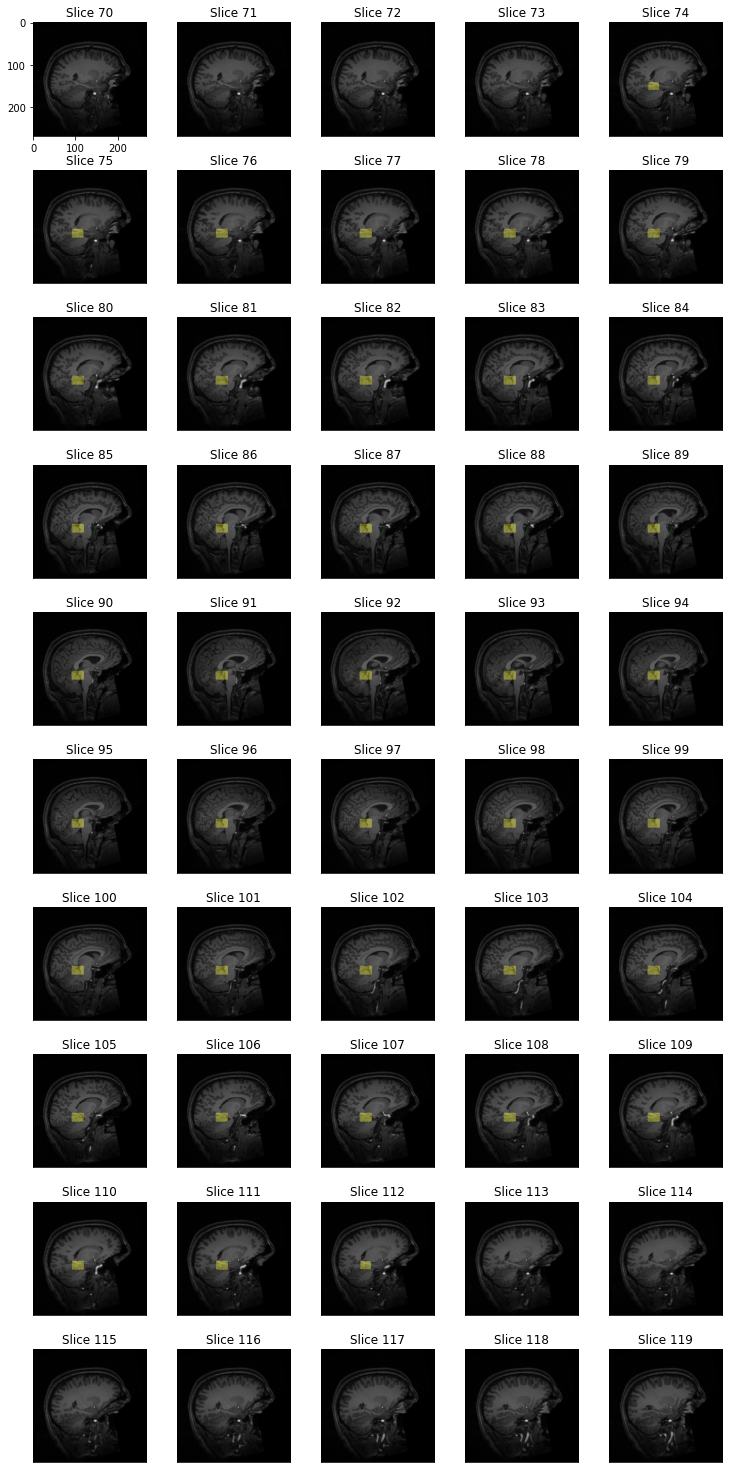

In [85]:
# Bbox is between 78-107 along axis 0.
slice_range = lrange(70,120)
viz_axis(sitk2np(obj), \
        bin_mask_arr = mask_arr, color1 = "yellow", alpha1=0.3,
        slices=slice_range, fixed_axis=0, \
        axis_fn = np.rot90, \
        grid = [10, 5], hspace=0.3, fig_mult=2)